In [3]:
import tensorflow as tf

In [4]:
#other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-07-20 06:14:42--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-07-20 06:14:42 (34.5 MB/s) - ‘moore.csv’ saved [2302/2302]



In [6]:
!head moore.csv'

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [10]:
# Load in the data
data = pd.read_csv('moore.csv',header=None).to_numpy()

In [11]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [12]:
X = data[:,0].reshape(-1, 1) # making N x D matrix
y = data[:, 1]

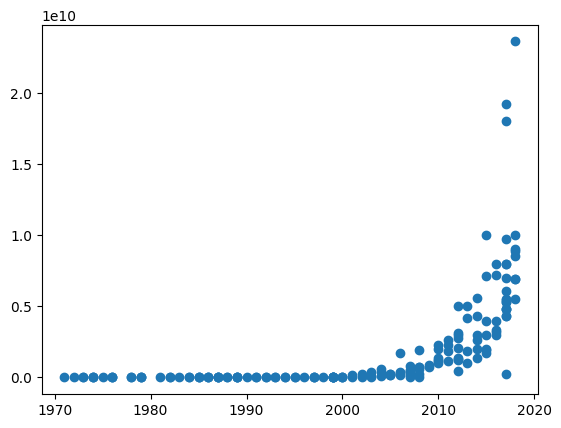

In [13]:
#plot the data
plt.scatter(X, y);

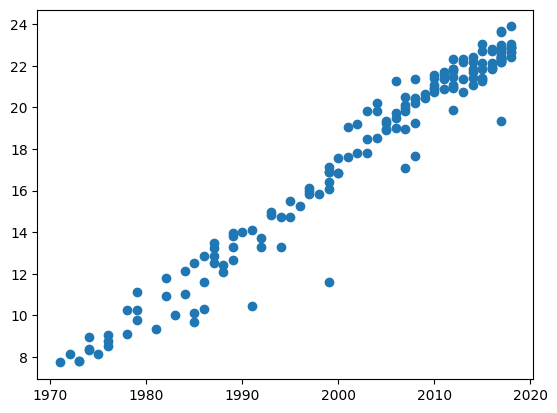

In [14]:
y = np.log(y)
plt.scatter(X, y);

In [15]:
X = X - X.mean()

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

In [17]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
    loss='mse',
    )

In [18]:
def shedule(epoch, lr):
  if epoch >=50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(shedule)

In [20]:
r = model.fit(X, y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 377.0165 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 318.3773 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 249.3353 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 216.3940 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 209.4549 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 161.4498 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 128.8762 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 76.1926 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 68.2748 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 45.8195 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 

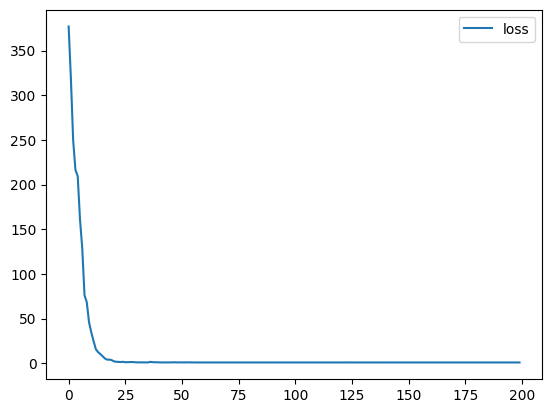

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='loss')
plt.legend();

In [22]:
model.layers

In [23]:
model.layers[0].get_weights()

[array([[0.3456474]], dtype=float32), array([17.777359], dtype=float32)]

In [25]:
a = model.layers[0].get_weights()[0][0, 0]

In [26]:
a

0.3456474

In [27]:
print("Time to double:", np.log(2) / a)

Time to double: 2.005359193427489


In [30]:
X = X.flatten()
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(y) - y.mean() * X.sum() / denominator)
b = (y.mean() * X.dot(X) - X.mean() * X.dot(y) ) / denominator
print(a, b)

10309.817698564839 17.764939393631764
